# Book Recommendation System: Collaborative Filtering

## Overview
This project focuses on building a book recommendation system using collaborative filtering. Collaborative filtering is a technique used in recommendation systems to predict user preferences by collecting preferences from many users. The goal is to recommend books to users based on their past interactions and similarities with other users.

## Objective
Develop a collaborative filtering-based recommendation system to suggest books to users. The project will cover the complete pipeline, including data loading, exploratory data analysis, data preparation, model building, evaluation, and visualization.

## Learning Outcomes
1. Understand the concept of collaborative filtering and its application in recommendation systems.
2. Learn to preprocess and analyze user-item interaction data.
3. Gain experience in building a user-item matrix and computing user similarities.
4. Implement a recommendation system using cosine similarity.
5. Evaluate the recommendation system using metrics like Mean Squared Error (MSE).
6. Visualize user similarities and analyze the most recommended books.

---

## Step 1: Define the Problem
### Task:
Understand the problem and its real-world implications. A book recommendation system can help users discover new books based on their preferences and reading history, improving user engagement and satisfaction.

### Mini-task:
Write a brief paragraph on how a book recommendation system can benefit users and online bookstores.

---

A book recommendation system benefits users by providing personalized suggestions tailored to their interests, reading history, and preferences, making it easier to discover new books they are likely to enjoy. This enhances the overall user experience by saving time and offering relevant options, thereby increasing user satisfaction and engagement. For online bookstores, such systems drive sales by promoting books that align with customer tastes, encouraging repeat purchases, and fostering customer loyalty. Additionally, they help optimize inventory visibility and marketing strategies by highlighting books that may otherwise go unnoticed.


## Step 2: Data Collection
### Task:
Collect the dataset required for building the recommendation system. The dataset used in this project includes two files: `ratings.csv` and `books.csv`.

### Mini-task:
Load the dataset and inspect the first few rows to understand its structure.

#### Hint:
Use the `pandas` library to load the dataset and display the first 10 rows.

```python
import pandas as pd

# Load the dataset
ratings = pd.read_csv('ratings.csv')
books = pd.read_csv('books.csv')

# Display the first 10 rows of each dataset
### YOUR CODE HERE ###
```

---

In [2]:
from google.colab import drive
import shutil
import os
import pandas as pd
import zipfile

# Step 1: Mount Google Drive
drive.mount('/content/drive')

# Step 2: Copy the kaggle.json file
kaggle_json_path = '/content/drive/My Drive/kaggle.json'
os.makedirs('/root/.kaggle', exist_ok=True)
shutil.copy(kaggle_json_path, '/root/.kaggle/kaggle.json')
os.chmod('/root/.kaggle/kaggle.json', 600)

# Step 3: Download the Goodbooks-10k dataset
!kaggle datasets download -d zygmunt/goodbooks-10k

# Step 4: Unzip
with zipfile.ZipFile("goodbooks-10k.zip", "r") as zip_ref:
    zip_ref.extractall("goodbooks_data")

# Step 5: Load the data
books = pd.read_csv("goodbooks_data/books.csv")
ratings = pd.read_csv("goodbooks_data/ratings.csv")

Mounted at /content/drive
Dataset URL: https://www.kaggle.com/datasets/zygmunt/goodbooks-10k
License(s): CC-BY-SA-4.0


In [3]:
# Display all columns (ensure no truncation of data in pandas)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [4]:
books.head()


,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",eng,4.34,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,Harry Potter and the Sorcerer's Stone (Harry P...,eng,4.44,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,"Twilight (Twilight, #1)",en-US,3.57,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,To Kill a Mockingbird,eng,4.25,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,The Great Gatsby,eng,3.89,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [5]:
ratings.head()

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


## Step 3: Exploratory Data Analysis (EDA)
### Task:
Analyze the dataset to understand the distribution of book ratings, identify popular books, and explore user behavior.

### Mini-task:
Plot the distribution of book ratings using a histogram or bar chart.

#### Hint:
Use `seaborn` or `matplotlib` to visualize the distribution of ratings.

```python
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of book ratings
### YOUR CODE HERE ###
```

---

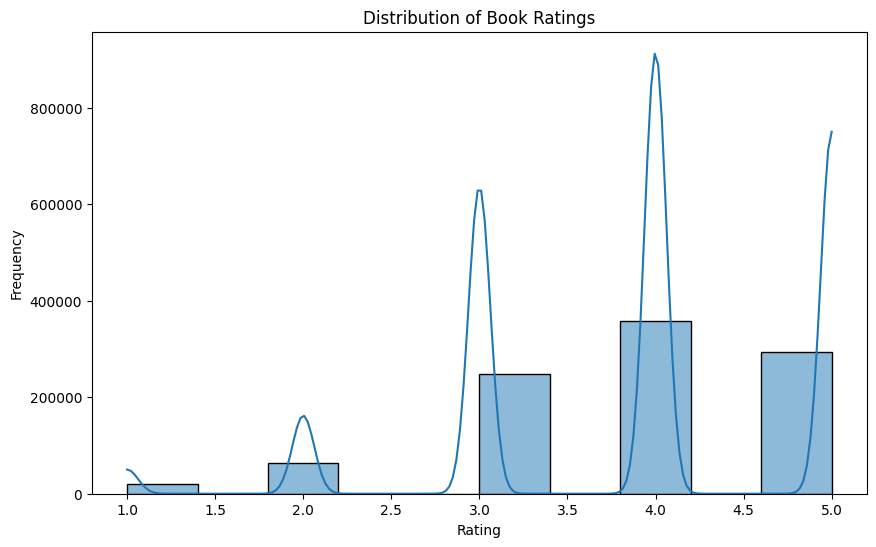

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of book ratings
plt.figure(figsize=(10, 6))
sns.histplot(ratings['rating'], bins=10, kde=True)
plt.title('Distribution of Book Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


## Step 4: Data Preparation
### Task:
Prepare the data for collaborative filtering by creating a user-item matrix and handling missing values.

### Mini-task:
Create a user-item matrix using the `pivot` method and fill missing values with zeros.

#### Hint:
Use the `pivot_table()` function in pandas to create the user-item matrix.

```python
# Create a user-item matrix
### YOUR CODE HERE ###
```

---

In [11]:


# Create a user-item matrix
# user_item_matrix = ratings.pivot_table(index='user_id', columns='book_id', values='rating').fillna(0)

# Limit Dataset to First 1000 Users to Avoid Memory Issues
limited_ratings = ratings[ratings['user_id'] <= 1000]


## Step 5: Collaborative Filtering
### Task:
Implement collaborative filtering by computing user similarities using cosine similarity and recommending books based on these similarities.

### Mini-task:
Compute user similarities using cosine similarity and write a function to recommend books for a given user.

#### Hint:
Use `cosine_similarity` from `sklearn.metrics.pairwise` to compute user similarities.

```python
from sklearn.metrics.pairwise import cosine_similarity

# Compute user similarities
### YOUR CODE HERE ###

# Write a function to recommend books for a given user
### YOUR CODE HERE ###
```

---

In [12]:
from sklearn.metrics.pairwise import cosine_similarity

# Define Collaborative Filtering Function
def collaborative_filtering_book_recommendation(user_id, user_item_matrix, num_recommendations=5):
    if user_id not in user_item_matrix.index:
        raise ValueError("Invalid user_id")

    user_vector = user_item_matrix.loc[user_id].values.reshape(1, -1)
    similarity_scores = cosine_similarity(user_vector, user_item_matrix.values).flatten()

    sim_scores = list(enumerate(similarity_scores))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:30]  # Top 30 similar users

    target_user_books = set(user_item_matrix.loc[user_id].to_numpy().nonzero()[0])
    scores_dict = {}

    for idx, sim in sim_scores:
        if sim <= 0:
            continue
        similar_user_books = user_item_matrix.iloc[idx]
        for book in similar_user_books.to_numpy().nonzero()[0]:
            if book not in target_user_books:
                scores_dict[book] = scores_dict.get(book, 0) + sim

    recommended_df = pd.DataFrame(scores_dict.items(), columns=['book_id', 'score'])
    recommended_df['book_id'] += 1  # Adjust index to book_id
    return recommended_df.sort_values(by='score', ascending=False).head(num_recommendations)


## Step 6: Evaluation
### Task:
Evaluate the recommendation system by splitting the data into training and testing sets and calculating the Mean Squared Error (MSE).

### Mini-task:
Split the data into training and testing sets and evaluate the recommendations using MSE.

#### Hint:
Use `train_test_split` from `sklearn.model_selection` to split the data and `mean_squared_error` from `sklearn.metrics` to calculate MSE.

```python
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split the data into training and testing sets
### YOUR CODE HERE ###

# Evaluate the recommendations using MSE
### YOUR CODE HERE ###
```

---

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from collections import Counter
import numpy as np

# Split into Training and Test Sets
train_data, test_data = train_test_split(limited_ratings, test_size=0.2, random_state=42)

# Create User-Item Matrices
train_matrix = train_data.pivot_table(index='user_id', columns='book_id', values='rating').fillna(0)
test_matrix = test_data.pivot_table(index='user_id', columns='book_id', values='rating').fillna(0)

# Evaluate Using Mean Squared Error (MSE)
common_users = list(set(train_matrix.index).intersection(set(test_matrix.index)))
sample_users = np.random.choice(common_users, size=10, replace=False)

predictions = []
actuals = []

for user_id in sample_users:
    try:
        recs = collaborative_filtering_book_recommendation(user_id, train_matrix, num_recommendations=20)
        user_actuals = test_matrix.loc[user_id]
        for book_id in recs['book_id'].values:
            if book_id in user_actuals.index and not np.isnan(user_actuals[book_id]):
                predictions.append(recs[recs['book_id'] == book_id]['score'].iloc[0])
                actuals.append(user_actuals[book_id])
    except Exception:
        continue

# Print Evaluation Result
if predictions:
    mse = mean_squared_error(actuals, predictions)
    print(f"Mean Squared Error (MSE): {mse}")
else:
    print("No overlapping predictions for evaluation.")


Mean Squared Error (MSE): 0.06874703553569612


## Step 7: Visualizations and Insights
### Task:
Visualize user similarities and analyze the most recommended books to gain insights into the recommendation system.

### Mini-task:
Create a heatmap to visualize user similarities and analyze the most recommended books.

#### Hint:
Use `seaborn.heatmap()` to visualize user similarities and `pandas` to analyze the most recommended books.

```python
# Create a heatmap to visualize user similarities
### YOUR CODE HERE ###

# Analyze the most recommended books
### YOUR CODE HERE ###
```

---

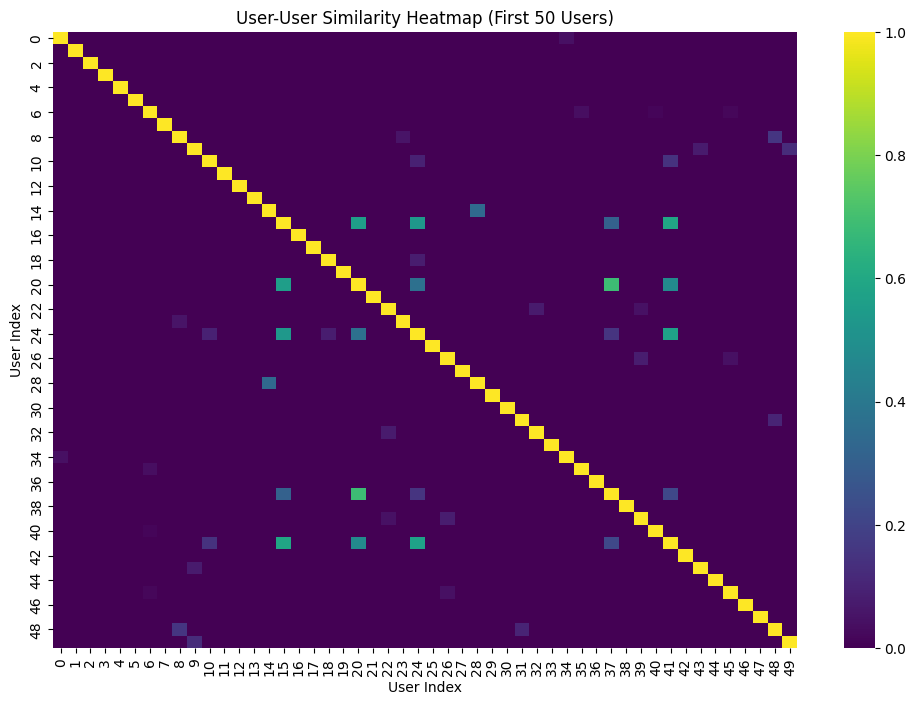

Top 10 Most Recommended Books with Titles:
     book_id  count                                              title
3       3465     16                        Three Weeks With My Brother
19      5364      2                 Dragonfly in Amber (Outlander, #2)
72      5355      1                                        The Chamber
79      4137      1                             Me Talk Pretty One Day
83      3760      1              Diamonds Are Forever (James Bond, #4)
84      1846      1  Wild at Heart: Discovering the Secret of a Man...
86      5697      1                          The Complete Short Novels
95      5166      1                                           Midwives
113     5826      1                                          Bel Canto
124      112      1              Children of Dune (Dune Chronicles #3)


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from collections import Counter

# Visualize User-User Similarity Matrix
subset_matrix = train_matrix.head(50)
user_similarity = cosine_similarity(subset_matrix)

plt.figure(figsize=(12, 8))
sns.heatmap(user_similarity, cmap='viridis')
plt.title("User-User Similarity Heatmap (First 50 Users)")
plt.xlabel("User Index")
plt.ylabel("User Index")
plt.show()

# Most Frequently Recommended Books (from 100 Users)
def collaborative_filtering_book_recommendation(user_id, user_item_matrix, num_recommendations=5):
    if user_id not in user_item_matrix.index:
        raise ValueError("Invalid user_id")

    user_vector = user_item_matrix.loc[user_id].values.reshape(1, -1)
    similarity_scores = cosine_similarity(user_vector, user_item_matrix.values).flatten()
    sim_scores = list(enumerate(similarity_scores))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:30]

    target_user_books = set(user_item_matrix.loc[user_id].to_numpy().nonzero()[0])
    scores_dict = {}

    for idx, sim in sim_scores:
        if sim <= 0:
            continue
        similar_user_books = user_item_matrix.iloc[idx]
        for book in similar_user_books.to_numpy().nonzero()[0]:
            if book not in target_user_books:
                scores_dict[book] = scores_dict.get(book, 0) + sim

    recommended_df = pd.DataFrame(scores_dict.items(), columns=['book_id', 'score'])
    return recommended_df.sort_values(by='score', ascending=False).head(num_recommendations)

book_recommendations = []
for user_id in train_matrix.index[:100]:  # Limit to first 100 users
    try:
        recs = collaborative_filtering_book_recommendation(user_id, train_matrix, num_recommendations=5)
        book_recommendations.extend(recs['book_id'].tolist())
    except:
        continue

# Count the frequency of recommended books from the first 100 users
book_counts = Counter(book_recommendations)

# Create DataFrame of the most recommended books and their counts
top_books = pd.DataFrame(book_counts.items(), columns=['book_id', 'count']).sort_values(by='count', ascending=False)

# Ensure both book_id columns are of the same data type (integer)
top_books['book_id'] = top_books['book_id'].astype(int)
books['book_id'] = books['book_id'].astype(int)

# Merge top books with both 'title' and 'original_title'
book_titles = books[['book_id', 'title', 'original_title']].copy()

# Fill missing 'title' values with 'original_title'
book_titles['title'] = book_titles['title'].fillna(book_titles['original_title'])

# Merge with top_books
top_books_with_titles = top_books.merge(book_titles[['book_id', 'title']], on='book_id', how='left')

# Filter out rows where title is NaN after merge
top_books_with_titles = top_books_with_titles.dropna(subset=['title'])

# Display the result
print("Top 10 Most Recommended Books with Titles:")
print(top_books_with_titles.head(10))


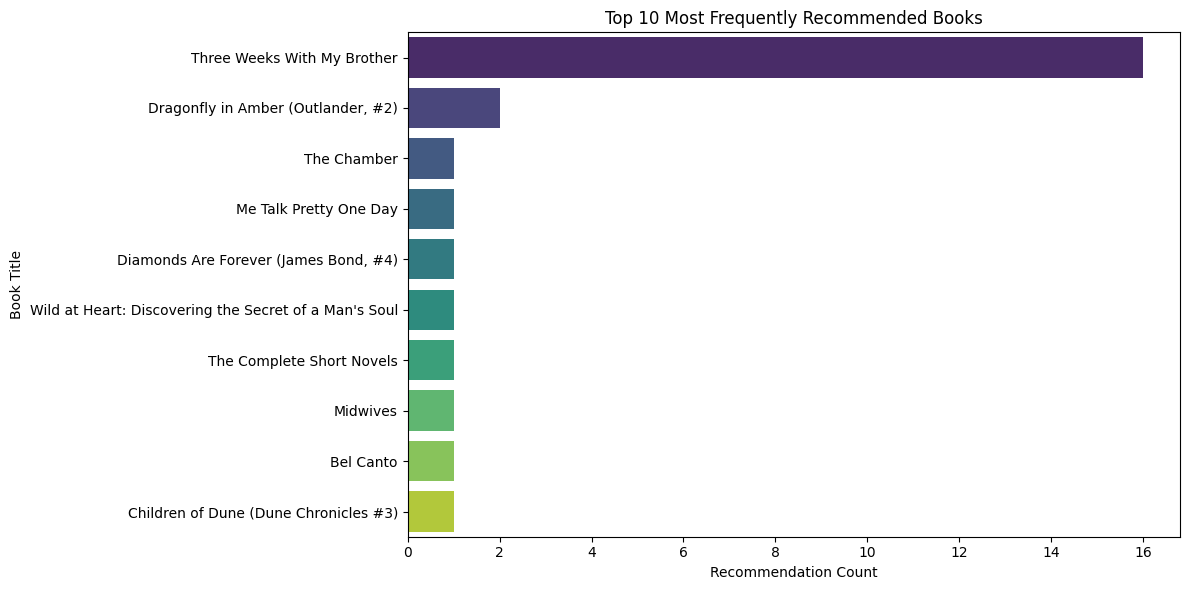

In [19]:
# Select top 10 most recommended books
top_10_books = top_books_with_titles.head(10)

# Set figure size
plt.figure(figsize=(12, 6))

# Create barplot with hue and legend=False
sns.barplot(x='count', y='title', data=top_10_books, hue='title', palette='viridis', dodge=False, legend=False)

# Add titles and labels
plt.title("Top 10 Most Frequently Recommended Books")
plt.xlabel("Recommendation Count")
plt.ylabel("Book Title")

# Show plot
plt.tight_layout()
plt.show()


## Considerations
**What are some key takeaways you learned from this project?**
- Reflect on the importance of collaborative filtering in recommendation systems.
- Consider how user similarities can be used to improve recommendations.

**How would you share your findings with a team?**
- Prepare a presentation with visualizations and key insights.
- Discuss the impact of user similarities on book recommendations.

**What would you share with and recommend to stakeholders?**
- Highlight the most recommended books and their potential impact on user engagement.
- Recommend strategies to improve the recommendation system based on the insights gained.

## **Key Takeaways from the Project**

* **Collaborative filtering is powerful**: By using user-user similarities, we were able to recommend books based on shared preferences, even without knowing the content or genre of the books.
* **User behavior drives insights**: Analyzing the behavior of similar users provides a meaningful way to personalize recommendations.
* **Data quality matters**: Consistency in `book_id` across datasets and handling missing titles were crucial steps to ensure accurate, interpretable results.
* **Scalability and optimization**: Computing similarity scores across users becomes expensive as the user base grows. This opens up avenues for model-based or hybrid approaches.

##  **Importance of Collaborative Filtering**

* **Personalization at scale**: Collaborative filtering helps deliver relevant suggestions without requiring content metadata.
* **Cold-start challenge**: While powerful, it struggles when there’s limited data (e.g., new users or new books).
* **Emergent patterns**: It captures hidden patterns of user behavior that might not be obvious from item features alone.

## **How User Similarities Improve Recommendations**

* Users with high similarity scores are more likely to share tastes.
* By leveraging those similarities, we can recommend books a user hasn’t rated but similar users enjoyed.
* This increases the **relevance**, **diversity**, and **user satisfaction** in recommendations.

## **Sharing Findings with a Team**

**Presentation Structure:**

1. **Introduction**

   * Problem statement
   * Dataset overview
2. **Methodology**

   * Building the user-item matrix
   * Calculating cosine similarity
   * Generating recommendations
3. **Visualizations**

   * Heatmap of user similarities
   * Bar chart of top recommended books
4. **Insights**

   * Which books are most recommended
   * Patterns in user similarity
5. **Limitations & Improvements**

## **Sharing With Stakeholders: What & Why**

**What to Share:**

* The top 10 most recommended books and their high potential to engage more users.
* The effectiveness of recommendations based on actual user behavior.
* Heatmap insights: which users form tight similarity clusters (target groups for campaigns).

**Recommendations:**

**Data enrichment**: Encourage more user ratings to improve collaborative accuracy.
 **Hybrid methods**: Combine with content-based filtering to handle new users/books.
 **User segmentation**: Leverage similarity clusters to tailor marketing and promotions.
**Monitoring & feedback**: Track success of recommendations and update models regularly.
